# Clasificador de Residuos: Reciclables vs. No Reciclables

### Este proyecto utiliza Computer Vision con YOLOv8 para identificar residuos en imágenes o video y clasificarlos en reciclables y no reciclables. Aplicaciones posibles: concientización ambiental, automatización de separación de residuos, aprendizaje de modelos de detección de objetos.

## Hernan Alvarenga - Valeria Feito - Ignacio Mendiola - Hugo Peña

## Instalación de librerías necesarias

In [ ]:
!pip install ultralytics opencv-python matplotlib -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.6 MB/s eta 0:00:00


## Cargar el modelo YOLOv8 preentrenado

In [ ]:
from ultralytics import YOLO
modelo = YOLO('yolov8m.pt')  # Modelo mediano con más precisión

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 49.7M/49.7M [00:00<00:00, 246MB/s]


## Clasificación de imágenes precargadas


image 1/1 /content/sample_image.jpg: 384x640 1 person, 1 bottle, 56.3ms
Speed: 14.1ms preprocess, 56.3ms inference, 365.1ms postprocess per image at shape (1, 3, 384, 640)


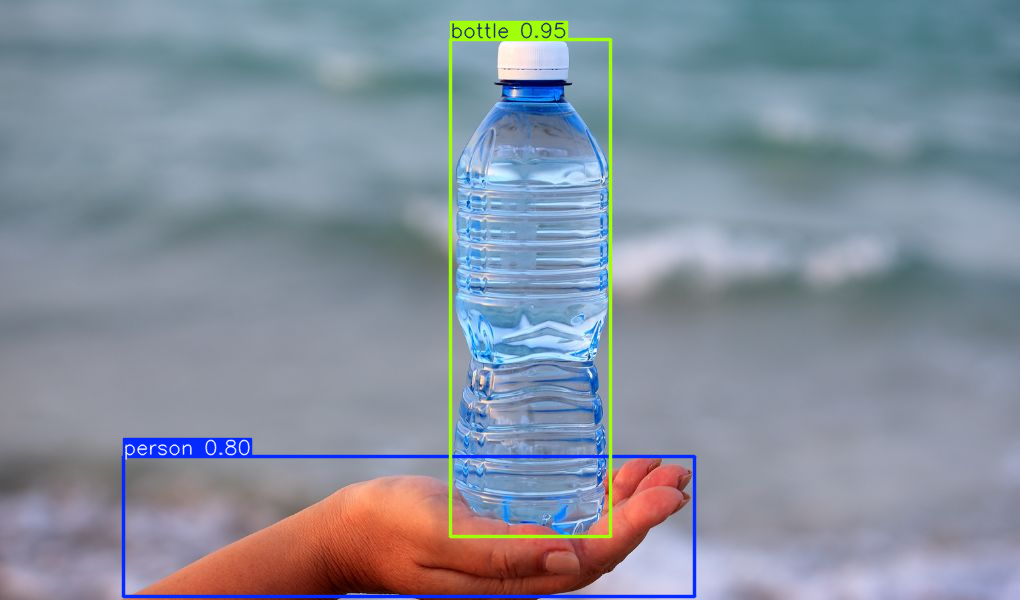

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Usar una imagen propia (subida) o de ejemplo
!wget https://www.rotolia.com/blog/wp-content/uploads/2022/11/botella-pet-plastico.jpg -q -O sample_image.jpg  # Cambiar según imagen
results = modelo("/content/sample_image.jpg")
results[0].show()

## Mapeo de clases: reciclables vs. no reciclables

In [ ]:
# Definir etiquetas según COCOreciclables = {'bottle', 'can', 'cup'}no_reciclables = {'banana', 'apple', 'pizza'}def clasificar_deteccion(results):    classes_detected = [modelo.names[int(cls)] for cls in results[0].boxes.cls]    reciclables_detectados = [c for c in classes_detected if c in reciclables]    no_reciclables_detectados = [c for c in classes_detected if c in no_reciclables]    return reciclables_detectados, no_reciclables_detectados

## Clasificación en tiempo real con webcam


In [ ]:
import cv2

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    results = modelo.predict(source=frame, show=True, conf=0.5)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

**Activación de la Webcam**

<IPython.core.display.Javascript object>


0: 480x640 3 persons, 1 bottle, 1 cup, 1 fork, 1 spoon, 1 potted plant, 28.2ms
Speed: 2.2ms preprocess, 28.2ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


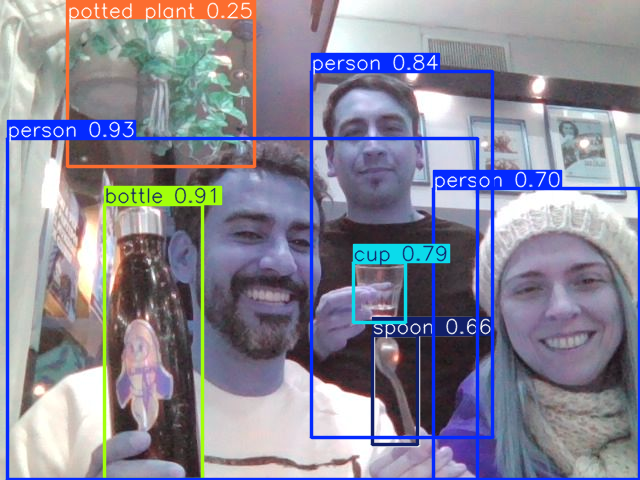

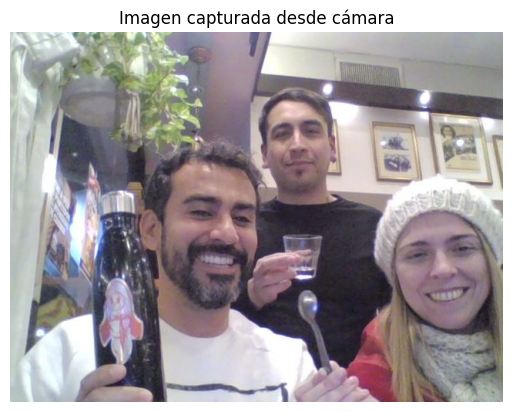

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
import cv2
import numpy as np
import PIL.Image
import io
import base64
import matplotlib.pyplot as plt

# Función para tomar la foto con la cámara del navegador
def take_photo(quality=0.8):
    js = Javascript('''
      async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = '📷 Tomar foto';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getTracks().forEach(track => track.stop());
        div.remove();

        return canvas.toDataURL('image/jpeg', quality);
      }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = io.BytesIO(base64.b64decode(data.split(',')[1]))
    return binary

# Tomar la foto
image_data = take_photo()

# Leer la imagen con PIL
image = PIL.Image.open(image_data)

# Convertir a formato numpy (si querés procesarla con OpenCV por ejemplo)
image_np = np.array(image)

# Mostrar con matplotlib
plt.imshow(image_np)
plt.axis('off')
plt.title("Imagen capturada desde cámara")

results = modelo(image_np)
results[0].show()

plt.show()

Codigo que detecta persona en tiempo real

<IPython.core.display.Javascript object>


image 1/1 /content/captured.jpg: 480x640 3 persons, 1 bottle, 1 cup, 1 spoon, 1 potted plant, 28.7ms
Speed: 1.4ms preprocess, 28.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


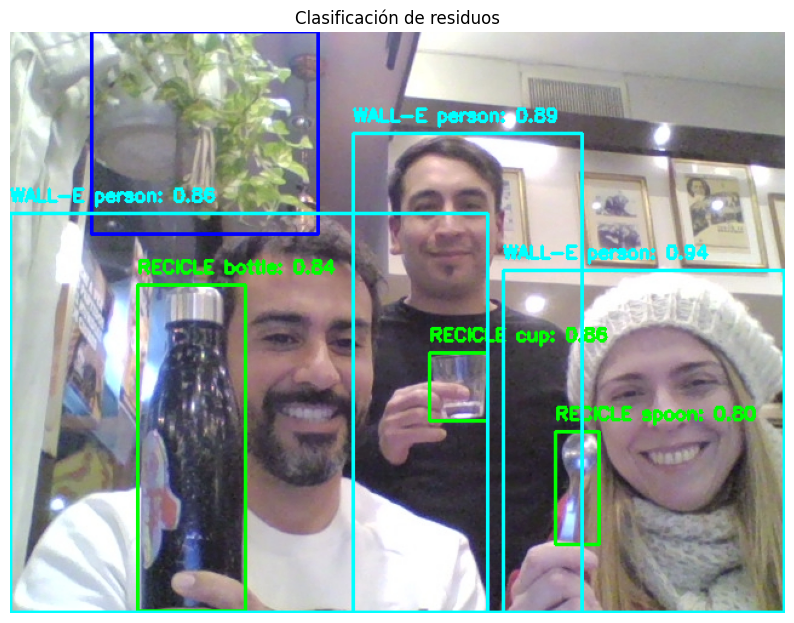

♻ Reciclables detectados: 3
✖ No reciclables detectados: 1
🌱 Compostables detectados: 0
🧍‍♂ Compostables detectados: 3


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Javascript
from google.colab.output import eval_js
import cv2
import numpy as np
import PIL.Image
import io
import base64
import matplotlib.pyplot as plt

# 1. Cargar modelo YOLOv8 (elige según el tamaño y precisión que necesites)
model = YOLO('yolov8m.pt')  # También puedes usar 'yolov8s.pt' o 'yolov8n.pt'

# 2. Función para capturar una foto desde la cámara
def take_photo(quality=1.0):
    js = Javascript('''
      async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = '📷 Tomar foto';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getTracks().forEach(track => track.stop());
        div.remove();

        return canvas.toDataURL('image/jpeg', quality);
      }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = io.BytesIO(base64.b64decode(data.split(',')[1]))
    return binary

# 3. Tomar la foto
image_data = take_photo()
image = PIL.Image.open(image_data)
image_np = np.array(image)

# 4. Convertir a BGR para OpenCV y guardar
image_bgr = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)
cv2.imwrite("captured.jpg", image_bgr)

# 5. Detectar objetos con YOLOv8
results = model("captured.jpg")

# 6. Definir las categorías según COCO
reciclables_ids = [39, 40, 41, 42, 43, 44, 45, 62, 63, 72, 73, 74, 75, 76, 77, 85, 86, 87]
no_reciclables_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 28, 31, 32, 56, 57, 58, 59, 60]
compostables_ids = [46, 47, 48, 49, 50, 51, 52, 53, 54, 55]

# 7. Clasificar los objetos detectados
reciclable_boxes = []
no_reciclable_boxes = []
compostable_boxes = []
person_boxes = []

for box in results[0].boxes:
    cls_id = int(box.cls[0])
    if cls_id in reciclables_ids:
        reciclable_boxes.append(box)
    elif cls_id in compostables_ids:
        compostable_boxes.append(box)
    elif cls_id in no_reciclables_ids:
        no_reciclable_boxes.append(box)
    elif cls_id == 0:
        person_boxes.append(box)

# 8. Dibujar cajas con colores y etiquetas
def draw_boxes(boxes, color, label_prefix):
    for box in boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
        cls_id = int(box.cls[0])
        class_name = model.names[cls_id]
        confidence = box.conf[0]
        label = f'{label_prefix} {class_name}: {confidence:.2f}'
        cv2.rectangle(image_bgr, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image_bgr, label, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

draw_boxes(reciclable_boxes, (0, 255, 0), "RECICLE")
draw_boxes(no_reciclable_boxes, (255, 0, 0), "NO RECICLE")
draw_boxes(compostable_boxes, (0, 0, 255), "ORGANICO")
draw_boxes(person_boxes, (255, 255, 0), "WALL-E")

# 9. Mostrar la imagen final
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Clasificación de residuos")
plt.show()

# 10. Mensaje resumen
print(f"♻ Reciclables detectados: {len(reciclable_boxes)}")
print(f"✖ No reciclables detectados: {len(no_reciclable_boxes)}")
print(f"🌱 Compostables detectados: {len(compostable_boxes)}")
print(f"🧍‍♂ Compostables detectados: {len(person_boxes)}")




## Validación con imágenes propias

Subí imágenes reales de residuos para probar si el modelo detecta correctamente objetos reciclables y no reciclables. Anotá observaciones por clase: ¿hay falsos positivos? ¿qué clase detecta mejor?

## Conclusiones y próximos pasos

¿Qué tan bien funcionó YOLOv8 para este tipo de clasificación?

YOLOv8 funcionó razonablemente bien para detectar objetos comunes que se pueden asociar con residuos reciclables, como botellas, latas o vasos. Su capacidad de generalización es adecuada para objetos entrenados dentro del dataset COCO, pero limitada cuando se enfrentó a residuos más ambiguos o con formas no convencionales.

En varios casos detectó correctamente objetos como bottle, cup, y can, pero no siempre fue capaz de reconocer residuos no reciclables o envases parcialmente cubiertos, deformados o sucios, lo cual afecta la clasificación contextual (por ejemplo, si un vaso de cartón está manchado con comida).

La clasificación entre reciclable vs. no reciclable no es nativa del modelo, sino una agrupación posterior, por lo que depende de cómo agrupamos las clases y puede haber ambigüedad.

¿Cómo mejoraría el dataset para entrenar un modelo propio en el futuro?

Podríamos crear un dataset etiquetado específicamente para esta tarea, con imágenes reales de residuos urbanos clasificados directamente en dos clases: "reciclable" y "no reciclable", incluyendo condiciones reales (residuos mezclados, iluminación variable, fondos desordenados).

Incluiría variabilidad en:

- Tipos de residuos (vidrio, cartón, plástico, comida, etc.)

- Estados de los residuos (limpios, sucios, arrugados, rotos)

- Escenarios (calles, cestos, centros de reciclaje)

Usaría herramientas como Roboflow para facilitar el etiquetado, y dividiría el dataset en entrenamiento, validación y test desde el inicio.

Consideraría el uso de Data Augmentation (rotación, blur, iluminación) para robustecer el modelo ante condiciones reales.

¿Qué aplicaciones concretas imaginás para esta solución?

Educación ambiental: una app o juego interactivo que enseñe a los niños a clasificar residuos correctamente usando IA y cámara del celular.

Clasificación automatizada en plantas de reciclaje: como paso previo a separación manual, ayudando a identificar residuos más rápidamente en líneas de montaje.

Contenedores inteligentes: incorporar este sistema a basureros públicos que alerten si se está arrojando residuos no reciclables al contenedor incorrecto.

Auditoría o monitoreo urbano: drones o cámaras que detecten residuos en espacios públicos y clasifiquen el tipo de desecho para análisis de políticas públicas.

Asistentes virtuales para hogares: aplicaciones móviles que ayuden a clasificar residuos domésticos antes de desecharlos.

Bonus: ¿Te animás a hacer una interfaz Gradio o exportar las detecciones a un CSV?